# Sloan Digital Sky Survey

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense, Activation
from keras.models import Sequential
%matplotlib inline

In [35]:
data = pd.read_csv("../input/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [36]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [37]:
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [38]:
data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512


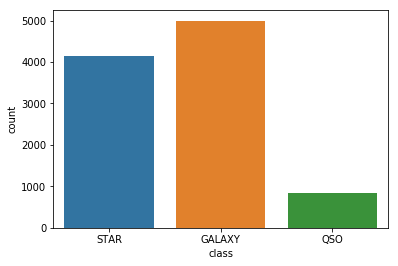

In [39]:
sns.countplot(x=data['class'])

In [40]:
#CONVERT AS CLASSES PARA ONE HOT ENCODING
labels = pd.get_dummies(data['class'], prefix='class')
data = data.drop(columns='class', axis=1)

data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0.000590,3306,54922,512


In [41]:
data.drop(['run','rerun','camcol','field'],axis=1,inplace=True)

In [42]:
data.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512


In [43]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

normalizado = scaler.fit_transform(data)

train = pd.DataFrame(normalizado)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [44]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.693832,0.074025,0.980965,0.595954,0.284177,0.219081,0.322108,0.000770,0.373281,0.566492,0.490490
1,0.694098,0.074642,0.858250,0.620126,0.343138,0.279811,0.426021,0.000762,0.006999,0.006268,0.540541
2,0.694422,0.074519,0.967188,0.757385,0.407640,0.316657,0.462532,0.023749,0.002579,0.075385,0.512513
3,0.695175,0.073487,0.722499,0.534197,0.301490,0.248584,0.382616,0.000751,0.373281,0.566492,0.509510
4,0.695225,0.074199,0.689960,0.486538,0.323925,0.283858,0.445782,0.000882,0.373281,0.566492,0.511512


In [45]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=128)

In [46]:
y_train.shape

(8000, 3)

In [68]:
model = Sequential()

model.add(Dense(30, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, epochs=100, batch_size=12, validation_split=0.10)

Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 2s 210us/step - loss: 0.9616 - acc: 0.5376 - val_loss: 0.8353 - val_acc: 0.7988
Epoch 2/100
7200/7200 [==============================] - 1s 132us/step - loss: 0.7379 - acc: 0.7874 - val_loss: 0.6253 - val_acc: 0.8175
Epoch 3/100
7200/7200 [==============================] - 1s 112us/step - loss: 0.6119 - acc: 0.7974 - val_loss: 0.5510 - val_acc: 0.8175
Epoch 4/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.5702 - acc: 0.7979 - val_loss: 0.5136 - val_acc: 0.8188
Epoch 5/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.5327 - acc: 0.7997 - val_loss: 0.4690 - val_acc: 0.8225
Epoch 6/100
7200/7200 [==============================] - 1s 112us/step - loss: 0.4733 - acc: 0.8261 - val_loss: 0.4090 - val_acc: 0.8688
Epoch 7/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.4116 - acc: 0.8582 - val_loss: 0.3677 - val_acc: 0

7200/7200 [==============================] - 1s 109us/step - loss: 0.0770 - acc: 0.9810 - val_loss: 0.0729 - val_acc: 0.9813
Epoch 61/100
7200/7200 [==============================] - 1s 109us/step - loss: 0.0748 - acc: 0.9815 - val_loss: 0.0712 - val_acc: 0.9838
Epoch 62/100
7200/7200 [==============================] - 1s 109us/step - loss: 0.0752 - acc: 0.9800 - val_loss: 0.0697 - val_acc: 0.9838
Epoch 63/100
7200/7200 [==============================] - 1s 108us/step - loss: 0.0737 - acc: 0.9807 - val_loss: 0.0726 - val_acc: 0.9850
Epoch 64/100
7200/7200 [==============================] - 1s 108us/step - loss: 0.0735 - acc: 0.9811 - val_loss: 0.0728 - val_acc: 0.9813
Epoch 65/100
7200/7200 [==============================] - 1s 110us/step - loss: 0.0728 - acc: 0.9810 - val_loss: 0.0680 - val_acc: 0.9863
Epoch 66/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.0717 - acc: 0.9815 - val_loss: 0.0657 - val_acc: 0.9863
Epoch 67/100
7200/7200 [=======================

In [70]:
y_pred = model.predict(X_test)

In [71]:
score = model.evaluate(X_test, y_test, verbose=0) 

In [72]:
score

[0.06836682832241059, 0.984]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


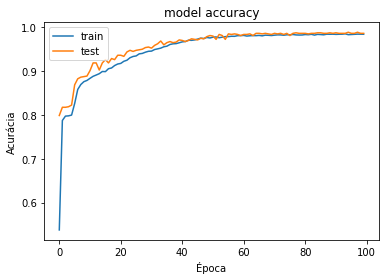

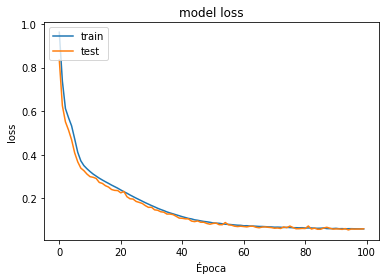

In [74]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Época')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 33        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [77]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [78]:
!ls

__notebook_source__.ipynb  model.png
